# P2W2D2PM - Natural Language Processing - Part 2

---
## Import Libraries

In [ ]:
# Import Libraries

import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

nltk.download('stopwords')
nltk.download('punkt')
!pip install pysastrawi

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 32.9 MB/s 


In [ ]:
# Data Loading

data = pd.read_csv("https://raw.githubusercontent.com/IanNarsa/sentiment-analysis/master/data/testSentimen.csv",header=None).rename({0:'sentimen',1:'text'},axis=1)
data.head()

,sentimen,text
0,|positive|,|@PrincessSuperC Hai Cici tersayang! Cuma mau ...
1,|positive|,|@Msdebramaye Saya mendengar tentang kontes it...
2,|positive|,|UNC!!! Pemenang NCAA!! Franklin St.: I ADA DI...
3,|positive|,|@DivHumas_Polri: Hoax dan Ujaran Kebencian da...
4,|positive|,|@DivHumas_Polri: Polri : Reuni 212 Berjalan K...


## Text Preprocessing

---
### Preprocessing - Single Document

- Ubah teks ke lowercase
- Menghilangkan tanda baca
- Menghilangkan karakter yang tidak diperlukan
- Menghilangkan stopwords
- Stemming

In [ ]:
# Melihat Teks Pertama

print(data.text[0])

|@PrincessSuperC Hai Cici tersayang! Cuma mau memberitaukan kalau saya cinta kamu! OH! Dan akan berkunjung secepatnya? Fantasi berkendari 5 Mei!!!!|


In [ ]:
# Ubah teks ke lowercase

teks = data.text[0]
teks_lower = teks.lower()
teks_lower

'|@princesssuperc hai cici tersayang! cuma mau memberitaukan kalau saya cinta kamu! oh! dan akan berkunjung secepatnya? fantasi berkendari 5 mei!!!!|'

In [ ]:
# Menghilangkan Tanda Baca

import string

teks_punc = teks_lower.translate(str.maketrans("","",string.punctuation))
teks_punc

'princesssuperc hai cici tersayang cuma mau memberitaukan kalau saya cinta kamu oh dan akan berkunjung secepatnya fantasi berkendari 5 mei'

In [ ]:
# Melihat Jenis-Jenis Tanda Baca yang Dihilangkan

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
teks_lower

'|@princesssuperc hai cici tersayang! cuma mau memberitaukan kalau saya cinta kamu! oh! dan akan berkunjung secepatnya? fantasi berkendari 5 mei!!!!|'

In [ ]:
# Preprocessing Lain

import re

teks_punc = re.sub("@[A-Za-z0-9_]+"," ", teks_lower) #Menghilangkan mention
teks = re.sub("#[A-Za-z0-9_]+"," ", teks) #Menghilangkan hashtag
teks_punc = re.sub(r"\\n"," ",teks_punc) #Menghilangkan \n
teks_punc = teks_punc.strip() #Menghilangkan whitespace
teks_punc = re.sub(r"http\S+", " ", teks_punc) #Menghilangkan link
teks_punc = re.sub(r"www.\S+", " ", teks_punc) #Menghilangkan link
teks_punc = re.sub("[^A-Za-z\s']"," ", teks_punc) #Menghilangkan yang bukan huruf
teks_punc = re.sub("rt"," ",teks_punc) #Menghilangkan RT
teks_punc = ' '.join(teks_punc.split())
teks_punc

'hai cici tersayang cuma mau memberitaukan kalau saya cinta kamu oh dan akan berkunjung secepatnya fantasi berkendari mei'

In [ ]:
# Menghilangkan Stopwords

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stpwds_id = list(set(stopwords.words('indonesian')))
stpwds_id.append('oh') # Cara lain dari "stpwds_id = stpwds_id + ['oh']"

tokens = word_tokenize(teks_punc)
teks_stopwords = ' '.join([word for word in tokens if word not in stpwds_id])

print('Document     : ', teks_punc)
print('Tokens       : ', tokens)
print('Clean Tokens : ', teks_stopwords)
# teks_stopwords

Document     :  hai cici tersayang cuma mau memberitaukan kalau saya cinta kamu oh dan akan berkunjung secepatnya fantasi berkendari mei
Tokens       :  ['hai', 'cici', 'tersayang', 'cuma', 'mau', 'memberitaukan', 'kalau', 'saya', 'cinta', 'kamu', 'oh', 'dan', 'akan', 'berkunjung', 'secepatnya', 'fantasi', 'berkendari', 'mei']
Clean Tokens :  hai cici tersayang memberitaukan cinta berkunjung secepatnya fantasi berkendari mei


In [ ]:
# Stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

teks_stemm  = stemmer.stem(teks_stopwords)

print('Document       : ', teks_punc)
print('Tokens         : ', tokens)
print('Clean Tokens   : ', teks_stopwords)
print('Stemmed Tokens : ', teks_stemm)

Document       :  hai cici tersayang cuma mau memberitaukan kalau saya cinta kamu oh dan akan berkunjung secepatnya fantasi berkendari mei
Tokens         :  ['hai', 'cici', 'tersayang', 'cuma', 'mau', 'memberitaukan', 'kalau', 'saya', 'cinta', 'kamu', 'oh', 'dan', 'akan', 'berkunjung', 'secepatnya', 'fantasi', 'berkendari', 'mei']
Clean Tokens   :  hai cici tersayang memberitaukan cinta berkunjung secepatnya fantasi berkendari mei
Stemmed Tokens :  hai cici sayang memberitaukan cinta kunjung cepat fantasi berkendari mei


---
### Preprocessing - All Documents

In [ ]:
# Membuuat Sebuah Function Agar Dapat Diterapkan pada DataFrame

def text_proses(teks):
  teks = teks.lower()
  teks = re.sub("@[A-Za-z0-9_]+"," ", teks) #Menghilangkan mention
  teks = re.sub("#[A-Za-z0-9_]+"," ", teks) #Menghilangkan hashtag
  teks = re.sub(r"\\n"," ",teks) #Menghilangkan \n
  teks = teks.strip()
  teks = re.sub(r"http\S+", " ", teks) #Menghilangkan link
  teks = re.sub(r"www.\S+", " ", teks) #Menghilangkan link
  teks = re.sub("[^A-Za-z\s']"," ", teks) #Menghilangkan yang bukan huruf
  teks = re.sub("rt"," ",teks) #Menghilangkan RT
  tokens = word_tokenize(teks)
  teks = ' '.join([word for word in tokens if word not in stpwds_id])
  teks = stemmer.stem(teks)
  return teks

In [ ]:
# Mengaplikasikan Semua Teknik Preprocessing ke dalam Semua Documents

data['text_processed'] = data['text'].apply(lambda x: text_proses(x))
data

,sentimen,text,text_processed
0,|positive|,|@PrincessSuperC Hai Cici tersayang! Cuma mau ...,hai cici sayang memberitaukan cinta kunjung ce...
1,|positive|,|@Msdebramaye Saya mendengar tentang kontes it...,dengar kontes selamat teman
2,|positive|,|UNC!!! Pemenang NCAA!! Franklin St.: I ADA DI...,unc menang ncaa franklin st i sana seru baik
3,|positive|,|@DivHumas_Polri: Hoax dan Ujaran Kebencian da...,hoax ujar benci ancam satu lapor janban sebar ...
4,|positive|,|@DivHumas_Polri: Polri : Reuni 212 Berjalan K...,polri reuni jalan kondusif
...,...,...,...
3704,|positive|,|yay|,yay
3705,|positive|,|yeah|,yeah
3706,|positive|,|yihaa|,yihaa
3707,|negative|,|dungu|,dungu


---
## Convert Target

In [ ]:
# Melihat Target Corpus

data.sentimen.unique()

array(['|positive|', '|neutral|', '|negative|', '|netral|'], dtype=object)

In [ ]:
# Mengubah Target Corpus dari String ke dalam Numeric

data['label'] = data['sentimen'].replace({'|negative|' : 0, '|neutral|' : 1, '|netral|' : 1, '|positive|' : 2})
data

,sentimen,text,text_processed,label
0,|positive|,|@PrincessSuperC Hai Cici tersayang! Cuma mau ...,hai cici sayang memberitaukan cinta kunjung ce...,2
1,|positive|,|@Msdebramaye Saya mendengar tentang kontes it...,dengar kontes selamat teman,2
2,|positive|,|UNC!!! Pemenang NCAA!! Franklin St.: I ADA DI...,unc menang ncaa franklin st i sana seru baik,2
3,|positive|,|@DivHumas_Polri: Hoax dan Ujaran Kebencian da...,hoax ujar benci ancam satu lapor janban sebar ...,2
4,|positive|,|@DivHumas_Polri: Polri : Reuni 212 Berjalan K...,polri reuni jalan kondusif,2
...,...,...,...,...
3704,|positive|,|yay|,yay,2
3705,|positive|,|yeah|,yeah,2
3706,|positive|,|yihaa|,yihaa,2
3707,|negative|,|dungu|,dungu,0


In [ ]:
# Melihat Persebaran Target

data['label'].value_counts()

0    2570
2     982
1     157
Name: label, dtype: int64

## Tokenization & Word Embedding

### Embedding Layer in Deep Learning with Tensorflow

In [ ]:
# Splitting Corpus

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(data.text_processed, 
                                                    data.label, 
                                                    test_size=0.25, 
                                                    random_state=46, 
                                                    stratify=data.label)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (2781,)
Test Size  :  (928,)


In [ ]:
# Get Vocabularies

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<2781x2337 sparse matrix of type '<class 'numpy.int64'>'
	with 5599 stored elements in Compressed Sparse Row format>

In [ ]:
# Import Libraries

import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding

In [ ]:
# Mencari Jumlah Vocab dan Panjang Token dalam Satu DOcument

jml_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Jumlah vocab:",jml_vocab)
print("Panjang maksimum kalimat:",max_sen_len,"kata")

Jumlah vocab: 2337
Panjang maksimum kalimat: 33 kata


In [ ]:
# Text Vectorization

text_vectorization = TextVectorization(max_tokens=jml_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,) # jika ingin menggunakan sequential API
                                       )

text_vectorization.adapt(X_train)

In [ ]:
# Contoh Text Vectorization

## Contoh Document
print('Contoh Document')
print(data.text_processed[0])
print('')

## Hasil Text Vectorization
print('Hasil Text Vectorization')
print(text_vectorization([data.text_processed[0]]))
print('Ukuran vector : ', text_vectorization([data.text_processed[0]]).shape)

Contoh Document
hai cici sayang memberitaukan cinta kunjung cepat fantasi berkendari mei

Hasil Text Vectorization
tf.Tensor(
[[1971 2165   87 1574  520 1679   29 2043 2235 1581    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]], shape=(1, 33), dtype=int64)
Ukuran vector :  (1, 33)


In [ ]:
# Melihat Top 20 Token (Diurutkan Berdasarkan Frekuensi Kemunculan Terbesar)

text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'x',
 'xe',
 'xa',
 'b',
 'yg',
 'f',
 'polri',
 'orang',
 'xf',
 'salah',
 'hina',
 'hukum',
 'd',
 'te',
 'hati',
 'sakit',
 'polisi',
 'penuh']

In [ ]:
# Embedding

embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [ ]:
# Contoh Hasil Embedding

## Contoh Document
print('Contoh Document')
print(data.text_processed[0])
print('')

## Hasil Text Vectorization
print('Hasil Text Vectorization')
print(text_vectorization([data.text_processed[0]]))
print('Ukuran vector : ', text_vectorization([data.text_processed[0]]).shape)
print('')

## Hasil Embedding
print('Hasil Embedding')
print(embedding(text_vectorization([data.text_processed[0]])))
print('Ukuran vector : ', embedding(text_vectorization([data.text_processed[0]])).shape)

Contoh Document
hai cici sayang memberitaukan cinta kunjung cepat fantasi berkendari mei

Hasil Text Vectorization
tf.Tensor(
[[1971 2165   87 1574  520 1679   29 2043 2235 1581    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]], shape=(1, 33), dtype=int64)
Ukuran vector :  (1, 33)

Hasil Embedding
tf.Tensor(
[[[-0.04259261  0.02862063  0.01730942 ... -0.01973701  0.03519993
    0.01865114]
  [-0.02503735  0.03564724 -0.03160299 ... -0.01626771  0.01315938
   -0.02510615]
  [ 0.01797562 -0.03513028  0.01623752 ... -0.03089571 -0.03174195
   -0.03026509]
  ...
  [-0.04229938  0.01449989  0.00603712 ... -0.01876223 -0.00649608
   -0.04782081]
  [-0.04229938  0.01449989  0.00603712 ... -0.01876223 -0.00649608
   -0.04782081]
  [-0.04229938  0.01449989  0.00603712 ... -0.01876223 -0.00649608
   -0.04782081]]], shape=(1, 33, 128), dtype=float32)
Ukuran vector :  (1, 33, 128)


## Modeling

---
### Change Target to One Hot Encoding

In [ ]:
# Mengubah Target ke dalam One Hot Encoding

from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

---
### Deep Learning - Fully Connected Layer

In [ ]:
# Model Training dengan menggunakan Dense Layer

from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU
from tensorflow.keras.models import Model, Sequential

model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GlobalAveragePooling1D())
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

model_dnn_hist_1 = model.fit(X_train,
                         y_train_ohe,
                         epochs=50,
                         validation_data=(X_test, y_test_ohe))

Epoch 1/50
87/87 [==============================] - 4s 7ms/step - loss: 0.8383 - accuracy: 0.6814 - val_loss: 0.7204 - val_accuracy: 0.6929
Epoch 2/50
87/87 [==============================] - 0s 5ms/step - loss: 0.7117 - accuracy: 0.6940 - val_loss: 0.7078 - val_accuracy: 0.6972
Epoch 3/50
87/87 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.7005 - val_loss: 0.6927 - val_accuracy: 0.7015
Epoch 4/50
87/87 [==============================] - 0s 5ms/step - loss: 0.6653 - accuracy: 0.7113 - val_loss: 0.6727 - val_accuracy: 0.7058
Epoch 5/50
87/87 [==============================] - 0s 5ms/step - loss: 0.6185 - accuracy: 0.7217 - val_loss: 0.6363 - val_accuracy: 0.7209
Epoch 6/50
87/87 [==============================] - 0s 5ms/step - loss: 0.5482 - accuracy: 0.7379 - val_loss: 0.6059 - val_accuracy: 0.7360
Epoch 7/50
87/87 [==============================] - 0s 4ms/step - loss: 0.4679 - accuracy: 0.7691 - val_loss: 0.5815 - val_accuracy: 0.7392
Epoch 8/50
87/87 [==

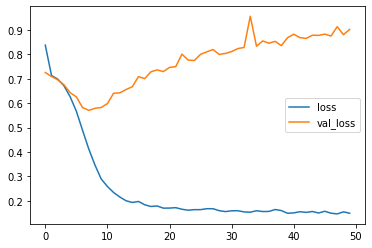

In [ ]:
# Melihat Performansi Model

metrics = pd.DataFrame(model_dnn_hist_1.history)
metrics[['loss', 'val_loss']].plot()

### LSTM

In [ ]:
# Model Training dengan Menggunakan LSTM

model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

model_lstm_hist_1 = model.fit(X_train,
                         y_train_ohe,
                         epochs=50,
                         validation_data=(X_test, y_test_ohe))

Epoch 1/50
87/87 [==============================] - 7s 19ms/step - loss: 0.6987 - accuracy: 0.7181 - val_loss: 0.6389 - val_accuracy: 0.7166
Epoch 2/50
87/87 [==============================] - 1s 10ms/step - loss: 0.2575 - accuracy: 0.8867 - val_loss: 0.7422 - val_accuracy: 0.7381
Epoch 3/50
87/87 [==============================] - 1s 9ms/step - loss: 0.2113 - accuracy: 0.8993 - val_loss: 0.7755 - val_accuracy: 0.7446
Epoch 4/50
87/87 [==============================] - 1s 9ms/step - loss: 0.2549 - accuracy: 0.9011 - val_loss: 1.0027 - val_accuracy: 0.7425
Epoch 5/50
87/87 [==============================] - 1s 10ms/step - loss: 0.1918 - accuracy: 0.9119 - val_loss: 0.7963 - val_accuracy: 0.7468
Epoch 6/50
87/87 [==============================] - 1s 9ms/step - loss: 0.1718 - accuracy: 0.9184 - val_loss: 1.0006 - val_accuracy: 0.7489
Epoch 7/50
87/87 [==============================] - 1s 9ms/step - loss: 0.1744 - accuracy: 0.9097 - val_loss: 0.8070 - val_accuracy: 0.7478
Epoch 8/50
87/87 

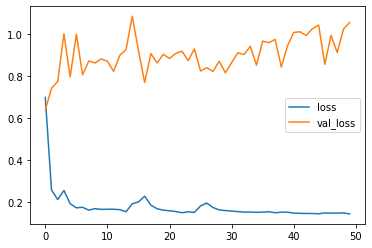

In [ ]:
# Melihat Performansi Model

metrics = pd.DataFrame(model_lstm_hist_1.history)
metrics[['loss', 'val_loss']].plot()

---
### GRU

In [ ]:
# Model Training dengan Menggunakan GRU

model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

model_gru_hist_1 = model.fit(X_train,
                         y_train_ohe,
                         epochs=50,
                         validation_data=(X_test, y_test_ohe))

Epoch 1/50
87/87 [==============================] - 5s 17ms/step - loss: 0.7809 - accuracy: 0.6796 - val_loss: 0.7397 - val_accuracy: 0.6929
Epoch 2/50
87/87 [==============================] - 1s 9ms/step - loss: 0.7397 - accuracy: 0.6926 - val_loss: 0.7302 - val_accuracy: 0.6929
Epoch 3/50
87/87 [==============================] - 1s 9ms/step - loss: 0.4525 - accuracy: 0.8051 - val_loss: 0.7701 - val_accuracy: 0.7252
Epoch 4/50
87/87 [==============================] - 1s 9ms/step - loss: 0.1931 - accuracy: 0.9123 - val_loss: 0.7991 - val_accuracy: 0.7403
Epoch 5/50
87/87 [==============================] - 1s 9ms/step - loss: 0.1625 - accuracy: 0.9223 - val_loss: 0.8518 - val_accuracy: 0.7457
Epoch 6/50
87/87 [==============================] - 1s 9ms/step - loss: 0.1547 - accuracy: 0.9223 - val_loss: 0.8884 - val_accuracy: 0.7478
Epoch 7/50
87/87 [==============================] - 1s 9ms/step - loss: 0.1504 - accuracy: 0.9248 - val_loss: 0.9220 - val_accuracy: 0.7446
Epoch 8/50
87/87 [=

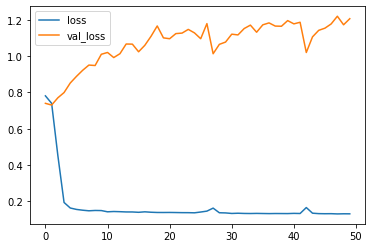

In [ ]:
metrics = pd.DataFrame(model_gru_hist_1.history)
metrics[['loss', 'val_loss']].plot()